In [3]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Uni lvl 100\AI DataSet\archive (8)\covid_19_clean_complete.csv")

In [23]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [29]:
#Review struct of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [31]:
#Identify missing values
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [39]:
#Visualize the missing data using heatmaps to determine if specific countries or dates have more gaps
''''import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)'''

"'import seaborn as sns\nsns.heatmap(df.isnull(), cbar=False)"

In [41]:
#dropping unimportant columns with missing values
df.drop(columns=['Province/State'], inplace=True)

In [43]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


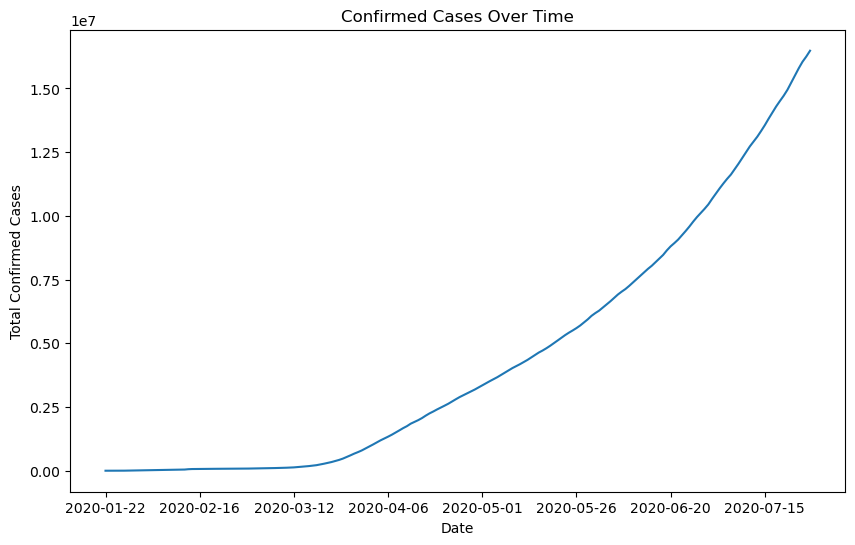

In [45]:
#Visualizing data
import matplotlib.pyplot as plt
df.groupby('Date')['Confirmed'].sum().plot(figsize=(10, 6))
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.show()

In [51]:
#Explore Relationships
#Investigate correlations between columns like Confirmed, Deaths, Recovered, and Active:
#Filter your dataframe to include only numerical columns

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                Lat      Long  Confirmed    Deaths  Recovered    Active
Lat        1.000000 -0.127259   0.036665  0.070040   0.015329  0.044392
Long      -0.127259  1.000000  -0.078911 -0.101340  -0.052391 -0.085688
Confirmed  0.036665 -0.078911   1.000000  0.912361   0.895506  0.950255
Deaths     0.070040 -0.101340   0.912361  1.000000   0.763090  0.891858
Recovered  0.015329 -0.052391   0.895506  0.763090   1.000000  0.713088
Active     0.044392 -0.085688   0.950255  0.891858   0.713088  1.000000


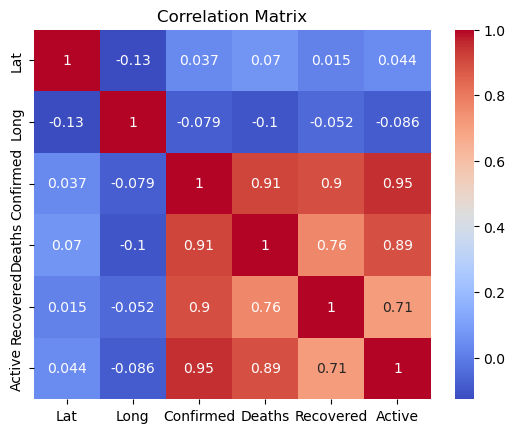

In [53]:
#Visualize the Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [73]:
'''Key Observations:
Confirmed vs. Deaths:
The heatmap shows a strong positive correlation (close to 1) between confirmed cases and deaths. This suggests that as the number of confirmed cases increases, the number of deaths also tends to increase.

Confirmed vs. Recovered:
Theres another strong positive correlation (near 1) between confirmed cases and recoveries. This indicates that countries or regions with higher confirmed cases also tend to report higher recoveries.

Active Cases vs. Deaths/Recovered:
Active cases might have weaker correlations with deaths and recoveries since they represent ongoing cases, which fluctuate over time.

Lat and Long:
Latitude and longitude have weak or no correlation with most other variables. This is expected, as they represent geographical coordinates rather than case metrics.'''

'Key Observations:\nConfirmed vs. Deaths:\nThe heatmap shows a strong positive correlation (close to 1) between confirmed cases and deaths. This suggests that as the number of confirmed cases increases, the number of deaths also tends to increase.\n\nConfirmed vs. Recovered:\nTheres another strong positive correlation (near 1) between confirmed cases and recoveries. This indicates that countries or regions with higher confirmed cases also tend to report higher recoveries.\n\nActive Cases vs. Deaths/Recovered:\nActive cases might have weaker correlations with deaths and recoveries since they represent ongoing cases, which fluctuate over time.\n\nLat and Long:\nLatitude and longitude have weak or no correlation with most other variables. This is expected, as they represent geographical coordinates rather than case metrics.'

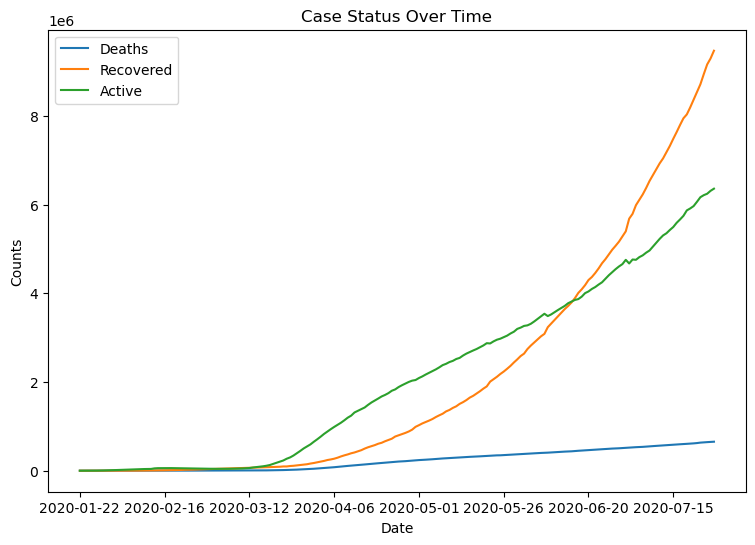

In [89]:
#Visualizing data
import matplotlib.pyplot as plt
df.groupby('Date')[['Deaths', 'Recovered', 'Active']].sum().plot(figsize=(9, 6))
plt.title('Case Status Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.show()

In [91]:
#Max n Min
# Find the date for maximum and minimum Deaths
max_deaths_date = df.loc[df['Deaths'].idxmax(), 'Date']
min_deaths_date = df.loc[df['Deaths'].idxmin(), 'Date']

# Find the date for maximum and minimum Recovered
max_recovered_date = df.loc[df['Recovered'].idxmax(), 'Date']
min_recovered_date = df.loc[df['Recovered'].idxmin(), 'Date']

# Find the date for maximum and minimum Active
max_active_date = df.loc[df['Active'].idxmax(), 'Date']
min_active_date = df.loc[df['Active'].idxmin(), 'Date']

# Display the results
print("Maximum Deaths occurred on:", max_deaths_date)
print("Minimum Deaths occurred on:", min_deaths_date)

print("Maximum Recovered occurred on:", max_recovered_date)
print("Minimum Recovered occurred on:", min_recovered_date)

print("Maximum Active cases occurred on:", max_active_date)
print("Minimum Active cases occurred on:", min_active_date)


Maximum Deaths occurred on: 2020-07-27
Minimum Deaths occurred on: 2020-01-22
Maximum Recovered occurred on: 2020-07-27
Minimum Recovered occurred on: 2020-01-22
Maximum Active cases occurred on: 2020-07-27
Minimum Active cases occurred on: 2020-06-02


Maximum Values Occurred on:
{'Deaths': '2020-07-27', 'Recovered': '2020-07-27', 'Active': '2020-07-27'}

Minimum Values Occurred on:
{'Deaths': '2020-01-22', 'Recovered': '2020-01-22', 'Active': '2020-06-02'}


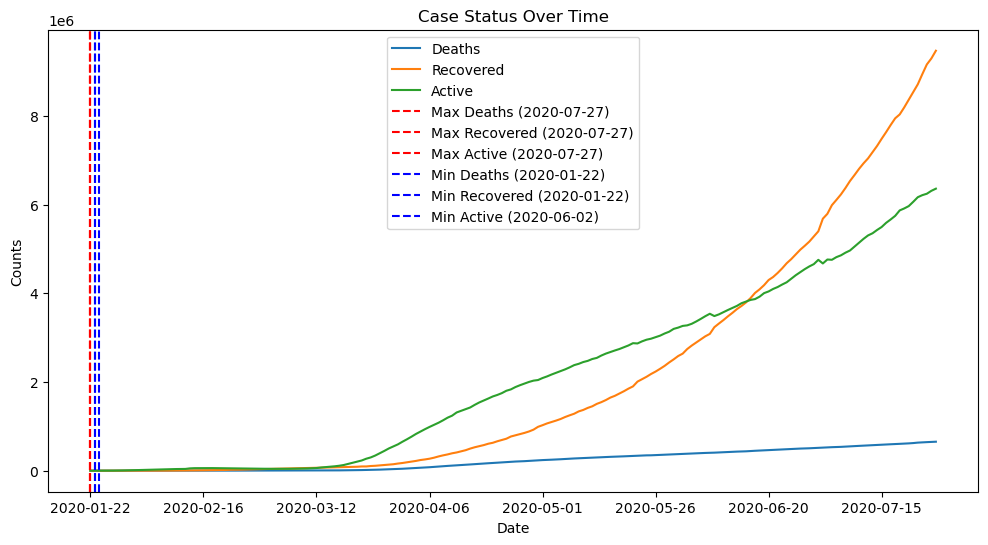

In [95]:
import matplotlib.pyplot as plt

# Extract dates for max and min values
max_values = {
    'Deaths': df.loc[df['Deaths'].idxmax(), 'Date'],
    'Recovered': df.loc[df['Recovered'].idxmax(), 'Date'],
    'Active': df.loc[df['Active'].idxmax(), 'Date']
}
min_values = {
    'Deaths': df.loc[df['Deaths'].idxmin(), 'Date'],
    'Recovered': df.loc[df['Recovered'].idxmin(), 'Date'],
    'Active': df.loc[df['Active'].idxmin(), 'Date']
}

print("Maximum Values Occurred on:")
print(max_values)

print("\nMinimum Values Occurred on:")
print(min_values)


#Visualize Key Dates
# Group data by date for visualization
daily_data = df.groupby('Date')[['Deaths', 'Recovered', 'Active']].sum()

# Plot the trends over time
daily_data.plot(figsize=(12, 6))
plt.title('Case Status Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')

# Mark max and min dates on the graph
for column, date in max_values.items():
    plt.axvline(x=date, color='red', linestyle='--', label=f'Max {column} ({date})')

for column, date in min_values.items():
    plt.axvline(x=date, color='blue', linestyle='--', label=f'Min {column} ({date})')

plt.legend()
plt.show()


In [99]:
#countries with the most and least cases, deaths, recoveries, and active cases
# Aggregate data by Country/Region
country_data = df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).reset_index()

# Find countries with maximum values and their corresponding values
max_cases_country = country_data.loc[country_data['Confirmed'].idxmax()]
max_deaths_country = country_data.loc[country_data['Deaths'].idxmax()]
max_recovered_country = country_data.loc[country_data['Recovered'].idxmax()]
max_active_country = country_data.loc[country_data['Active'].idxmax()]

# Find countries with minimum values and their corresponding values
min_cases_country = country_data.loc[country_data['Confirmed'].idxmin()]
min_deaths_country = country_data.loc[country_data['Deaths'].idxmin()]
min_recovered_country = country_data.loc[country_data['Recovered'].idxmin()]
min_active_country = country_data.loc[country_data['Active'].idxmin()]

# Print results
print("Country with the most confirmed cases:", max_cases_country['Country/Region'], "-", max_cases_country['Confirmed'])
print("Country with the most deaths:", max_deaths_country['Country/Region'], "-", max_deaths_country['Deaths'])
print("Country with the most recoveries:", max_recovered_country['Country/Region'], "-", max_recovered_country['Recovered'])
print("Country with the most active cases:", max_active_country['Country/Region'], "-", max_active_country['Active'])

print("Country with the least confirmed cases:", min_cases_country['Country/Region'], "-", min_cases_country['Confirmed'])
print("Country with the least deaths:", min_deaths_country['Country/Region'], "-", min_deaths_country['Deaths'])
print("Country with the least recoveries:", min_recovered_country['Country/Region'], "-", min_recovered_country['Recovered'])
print("Country with the least active cases:", min_active_country['Country/Region'], "-", min_active_country['Active'])

Country with the most confirmed cases: US - 224345948
Country with the most deaths: US - 11011411
Country with the most recoveries: US - 56353416
Country with the most active cases: US - 156981121
Country with the least confirmed cases: Western Sahara - 901
Country with the least deaths: Bhutan - 0
Country with the least recoveries: Canada - 0
Country with the least active cases: Greenland - 135


In [111]:
# Filter data for Ghana
ghana_data = df[df['Country/Region'] == 'Ghana']

# Calculate total confirmed cases and recoveries for Ghana
if not ghana_data.empty:
    total_confirmed = ghana_data['Confirmed'].sum()
    total_recovered = ghana_data['Recovered'].sum()
    total_deaths = ghana_data['Deaths'].sum()
    print(f"Total Confirmed Cases in Ghana: {total_confirmed}")
    print(f"Total Recoveries in Ghana: {total_recovered}")
    print(f"Total Deaths in Ghana: {total_deaths}")
else:
    print("Ghana is not in the dataset.")


Total Confirmed Cases in Ghana: 1246644
Total Recoveries in Ghana: 814529
Total Deaths in Ghana: 6908
